# Flux Vision Data

In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify

%matplotlib inline

In [72]:
# reading the csv file
df = pd.read_csv('data/Zoning Province/Flux_24h.csv',sep = ';')
#consider only 'Date','Origin' and 'Destination'
df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()
df

Date        Origin     Destination  Volume
0      2020-01-31      Bas-Uele          Tshopo     248
1      2020-01-31      Equateur        Kinshasa     867
2      2020-01-31      Equateur     Nord-Ubangi     288
3      2020-01-31      Equateur      Sud-Ubangi     289
4      2020-01-31  Haut-Katanga  Kasai-Oriental     102
...           ...           ...             ...     ...
18650  2020-06-29        Tshopo           Ituri     505
18651  2020-06-29        Tshopo         Maniema     404
18652  2020-06-29        Tshopo         Mongala    1215
18653  2020-06-29        Tshopo        Sud-Kivu     101
18654  2020-06-29       Tshuapa          Tshopo     691

[18655 rows x 4 columns]

In [73]:
df.head(5)

Date        Origin     Destination  Volume
0  2020-01-31      Bas-Uele          Tshopo     248
1  2020-01-31      Equateur        Kinshasa     867
2  2020-01-31      Equateur     Nord-Ubangi     288
3  2020-01-31      Equateur      Sud-Ubangi     289
4  2020-01-31  Haut-Katanga  Kasai-Oriental     102

In [74]:
df.tail(5)

Date   Origin Destination  Volume
18650  2020-06-29   Tshopo       Ituri     505
18651  2020-06-29   Tshopo     Maniema     404
18652  2020-06-29   Tshopo     Mongala    1215
18653  2020-06-29   Tshopo    Sud-Kivu     101
18654  2020-06-29  Tshuapa      Tshopo     691

In [75]:
# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

## Checking for null and missing values

In [76]:
df[(df.Volume.isnull())|(df.Volume.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [77]:
df[(df.Date.isnull())|(df.Date.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [78]:
df[(df.Origin.isnull())|(df.Origin.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [81]:
df[(df.Destination.isnull())|(df.Destination.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Volume, Date_day]
Index: []

In [82]:
df.describe()

Volume      Date_day
count   18655.000000  18655.000000
mean    18052.521094      2.998660
std     43461.758072      2.000415
min        21.000000      0.000000
25%       210.000000      1.000000
50%      1361.000000      3.000000
75%     12730.000000      5.000000
max    607624.000000      6.000000

## Total flux visualization

In [83]:
df_total_flux = df.groupby(by=['Date',], as_index=0).sum()

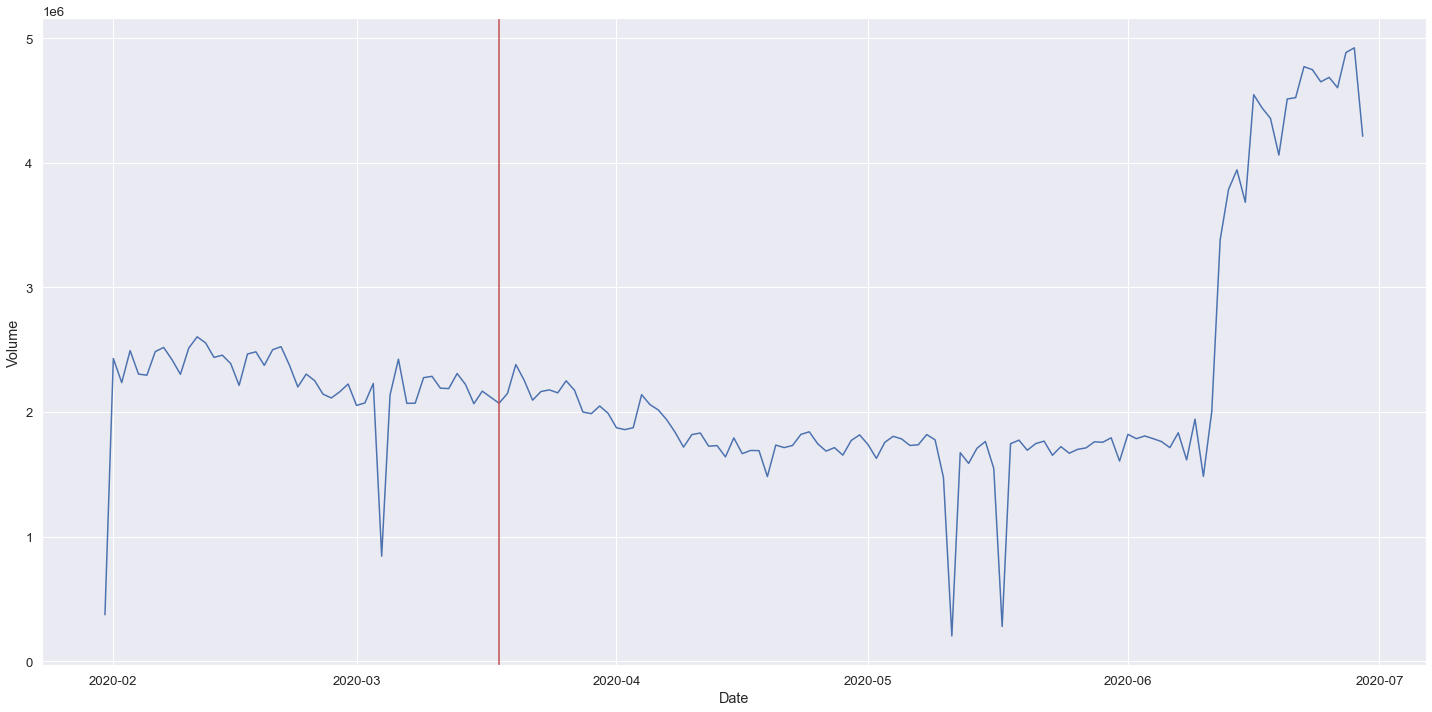

In [87]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [85]:
# df.to_csv('../../data/Flux_24h.csv', sep = ',')

### Origins count and list

In [88]:
len(df.groupby(by = 'Origin').groups.keys())

27

In [89]:
list((df.groupby(by = 'Origin').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Hors_Zone',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [90]:
df['Origin'].value_counts()

Hors_Zone         3923
Kinshasa          1548
Tshopo             974
Kasai-Central      881
Nord-Kivu          877
Haut-Lomami        854
Haut-Katanga       850
Lomami             737
Kasai-Oriental     691
Kwilu              668
Kasai              578
Mongala            552
Lualaba            546
Tanganyika         532
Ituri              520
Sud-Kivu           515
Maniema            487
Equateur           470
Sud-Ubangi         330
Kwango             326
Mai-Ndombe         317
Bas-Uele           312
Haut-Uele          311
Nord-Ubangi        285
Sankuru            232
Kongo-Central      206
Tshuapa            133
Name: Origin, dtype: int64

### Destination count and list

In [91]:
len(df.groupby(by = 'Destination').groups.keys())

26

In [92]:
list((df.groupby(by = 'Destination').groups.keys()))

['Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'Kasai',
 'Kasai-Central',
 'Kasai-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Mai-Ndombe',
 'Maniema',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa']

In [93]:
df['Destination'].value_counts()

Kinshasa          1725
Tshopo            1082
Nord-Kivu         1046
Kasai-Central      962
Haut-Lomami        950
Haut-Katanga       941
Lomami             893
Kasai-Oriental     893
Kwilu              834
Tanganyika         719
Kasai              717
Ituri              700
Lualaba            689
Sud-Kivu           676
Mongala            652
Maniema            640
Equateur           569
Sud-Ubangi         529
Haut-Uele          492
Kwango             485
Mai-Ndombe         478
Bas-Uele           471
Nord-Ubangi        442
Sankuru            419
Kongo-Central      348
Tshuapa            303
Name: Destination, dtype: int64

### Symmetry check 

In [94]:
df[((df['Origin'] == 'Bas-Uele') & (df['Destination'] == 'Kinshasa'))|((df['Origin'] == 'Kinshasa') & (df['Destination'] == 'Bas-Uele'))]

Date    Origin Destination  Volume  Date_day
6482  2020-03-17  Kinshasa    Bas-Uele      64         1
10910 2020-04-23  Bas-Uele    Kinshasa      21         3

### Shapefile Reading

In [95]:
zone_gd =gpd.read_file('./data/GEO DRC/RDC_Macro_Provinces.shp')
zone_gd

Index        C0        C1    Surface        PROVINCE  Population  \
0      22  0.415854  0.011909   52049.63      Sud-Ubangi   2 744 345   
1       7  0.458879  0.012838   54171.85     Nord-Ubangi   1 037 000   
2       2  0.451896  0.042421   56144.21         Mongala   1 793 564   
3      24  0.351923  0.003476  102527.71        Equateur   1 626 606   
4       8  0.247170  0.006137  132254.42         Tshuapa   1 316 855   
5      18  0.448842  0.040899  128920.31      Maï-Ndombe   1 768 327   
6      11  0.860444  0.013058   54797.26   Kongo-Central   5 575 000   
7       6  0.825040  0.071389   10690.79        Kinshasa  12 641 463   
8      20  0.478043  0.036460   90159.33          Kwango   1 994 036   
9      17  0.589400  0.045920   79270.37           Kwilu   3 637 000   
10     13  0.643254  0.039597   96648.35           Kasaï   3 199 891   
11     23  0.752269  0.082495   57045.44   Kasaï-Central   2 976 806   
12     16  0.844232  0.122613   10216.83  Kasaï-Oriental   5 475 398   
13     15  0.769327  0.081114   54314.18          Lomami   2 048 839   
14     25  0.688503  0.034374  109587.20     Haut-Lomami   2 540 127   
15      5  0.658575  0.037058  121992.73         Lualaba   1 677 288   
16      4  0.711857  0.022679  126576.44    Haut-Katanga   3 960 945   
17      1  0.524977  0.013152  134692.21      Tanganyika   2 482 009   
18     26  0.746701  0.034413   60031.77       Nord-Kivu   8 985 711   
19      9  0.529363  0.012831   65199.55        Sud-Kivu   5 772 000   
20     19  0.438406  0.025023  128678.93         Maniema   2 333 000   
21      3  0.385224  0.011245  108400.19         Sankuru   1 007 000   
22     10  0.395584  0.025731  201525.01          Tshopo   2 614 630   
23     14  0.388050  0.024537  149347.27        Bas-Uele   1 093 845   
24     21  0.495825  0.038647   92916.10       Haut-Uele   1 920 867   
25     12  0.686450  0.041201   66389.05           Ituri   4 241 236   

                                             geometry  
0   POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1   POLYGON ((20.39471 2.82687, 20.38231 2.81683, ...  
2   POLYGON ((21.63564 0.72938, 21.63387 0.72562, ...  
3   POLYGON ((16.94268 -1.86609, 16.94502 -2.00127...  
4   POLYGON ((21.84714 -2.53010, 21.84408 -2.53239...  
5   POLYGON ((20.27067 -4.39762, 20.26608 -4.39898...  
6   POLYGON ((12.45101 -6.05762, 12.44231 -6.05843...  
7   POLYGON ((15.83177 -5.02521, 15.83079 -5.02540...  
8   POLYGON ((17.61132 -8.12849, 17.58297 -8.12907...  
9   POLYGON ((19.36211 -6.39133, 19.35877 -6.39137...  
10  POLYGON ((20.57820 -7.29812, 20.54287 -7.29890...  
11  MULTIPOLYGON (((22.68625 -7.88297, 22.66109 -7...  
12  MULTIPOLYGON (((23.61644 -6.77145, 23.60941 -6...  
13  POLYGON ((23.68508 -7.99435, 23.68487 -7.99446...  
14  MULTIPOLYGON (((24.93444 -10.12938, 24.93029 -...  
15  POLYGON ((25.53683 -11.73446, 25.53175 -11.739...  
16  POLYGON ((29.72198 -13.45500, 29.71200 -13.456...  
17  MULTIPOLYGON (((28.06762 -8.41209, 28.06240 -8...  
18  POLYGON ((28.10913 -2.06207, 28.09976 -2.06577...  
19  MULTIPOLYGON (((28.90091 -5.00969, 28.80352 -5...  
20  MULTIPOLYGON (((28.41204 -5.01963, 28.40892 -5...  
21  MULTIPOLYGON (((23.90875 -5.85458, 23.90625 -5...  
22  POLYGON ((25.27648 -2.09896, 25.24008 -2.11198...  
23  POLYGON ((27.04530 1.95042, 27.04404 1.94119, ...  
24  POLYGON ((27.77349 1.44670, 27.77349 1.44325, ...  
25  POLYGON ((28.56843 0.52260, 28.55496 0.51962, ...

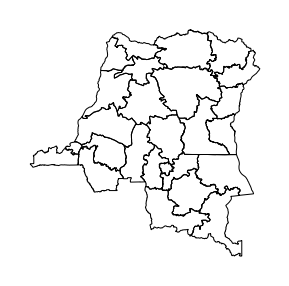

In [96]:
gpl.polyplot(zone_gd, figsize=(5,5))
plt.show()

# Mobility Visualization

## $\Delta$ Mobillity (IN) By Provinces

In [97]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref = df.loc[mask_base]
df_obs = df.loc[mask_obs]


## Reference period

In [98]:
df_ref_agg = df_ref.groupby(by='Destination',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg.drop('Date_day',inplace=True,axis = 1)
df_ref_agg

Destination    Volume
8   Kasai-Oriental  15713253
18       Nord-Kivu  11481235
13          Lomami  11287918
2     Haut-Katanga   9983013
21        Sud-Kivu   9906210
7    Kasai-Central   7948073
9         Kinshasa   7235112
14         Lualaba   6618356
24          Tshopo   3957420
10   Kongo-Central   3535196
12           Kwilu   3424013
1         Equateur   3181818
6            Kasai   2740731
3      Haut-Lomami   1464429
5            Ituri   1302005
11          Kwango   1277354
15      Mai-Ndombe   1218327
16         Maniema   1140872
22      Sud-Ubangi   1015890
17         Mongala    894237
19     Nord-Ubangi    464164
0         Bas-Uele    229497
25         Tshuapa    188869
23      Tanganyika    174633
4        Haut-Uele    101924
20         Sankuru     87354

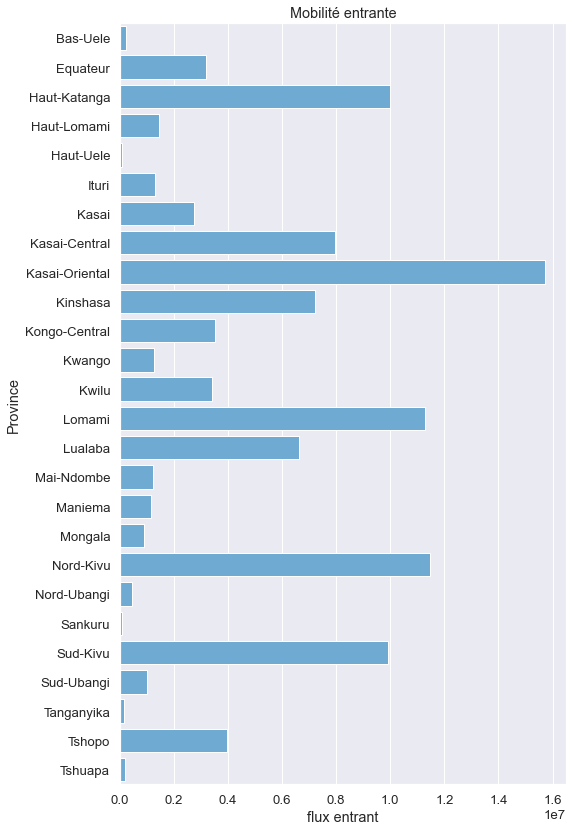

In [99]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_ref_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

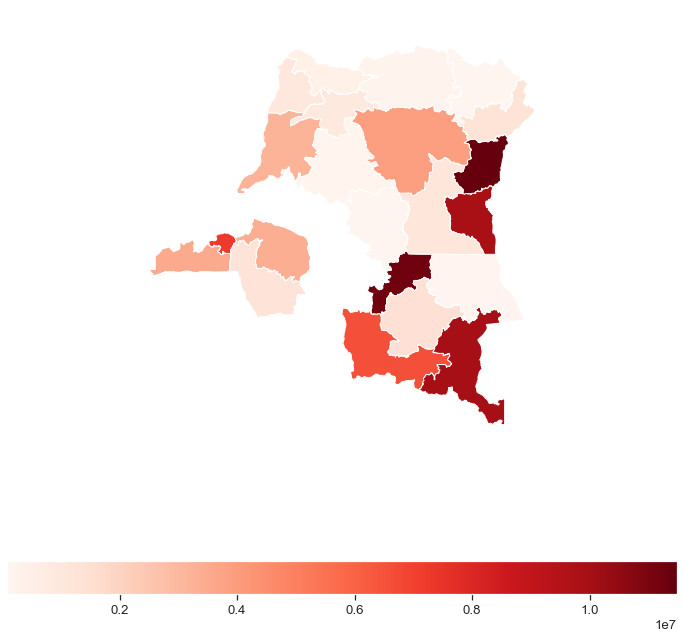

In [101]:
merged_df_agg = zone_gd.merge(df_ref_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [102]:
df_obs_agg = df_obs.groupby(by='Destination',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg.drop('Date_day',inplace=True,axis = 1)
df_obs_agg

Destination    Volume
8   Kasai-Oriental  33414921
13          Lomami  23952281
18       Nord-Kivu  20307480
21        Sud-Kivu  19603468
2     Haut-Katanga  19096041
9         Kinshasa  18087187
7    Kasai-Central  17816916
24          Tshopo  12272864
14         Lualaba  11370242
12           Kwilu   8433125
1         Equateur   8346570
10   Kongo-Central   8123675
6            Kasai   5254192
15      Mai-Ndombe   4162152
3      Haut-Lomami   3190022
22      Sud-Ubangi   3163468
11          Kwango   2862317
16         Maniema   2689295
17         Mongala   2634214
5            Ituri   2142905
19     Nord-Ubangi   1440317
25         Tshuapa    571503
23      Tanganyika    280819
0         Bas-Uele    243982
4        Haut-Uele    184440
20         Sankuru    180718

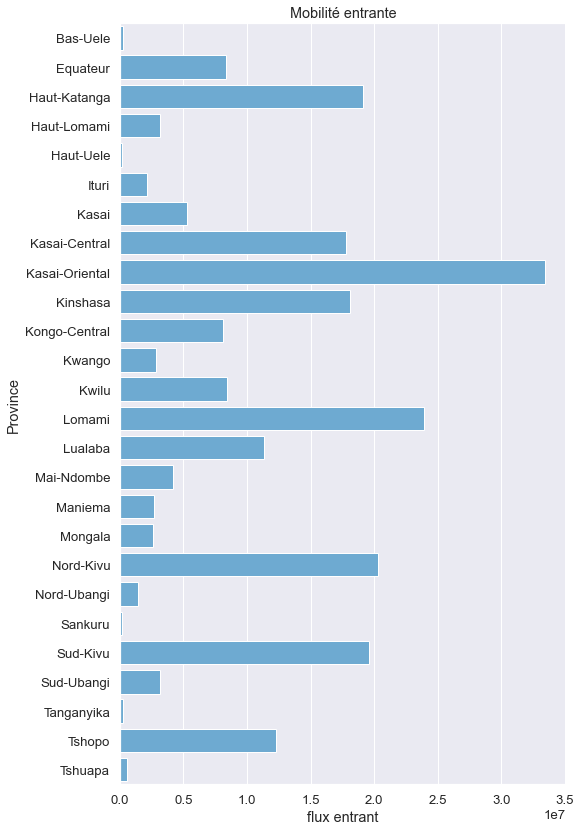

In [104]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_obs_agg.sort_values(by = 'Destination',ascending=1), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
plt.show()

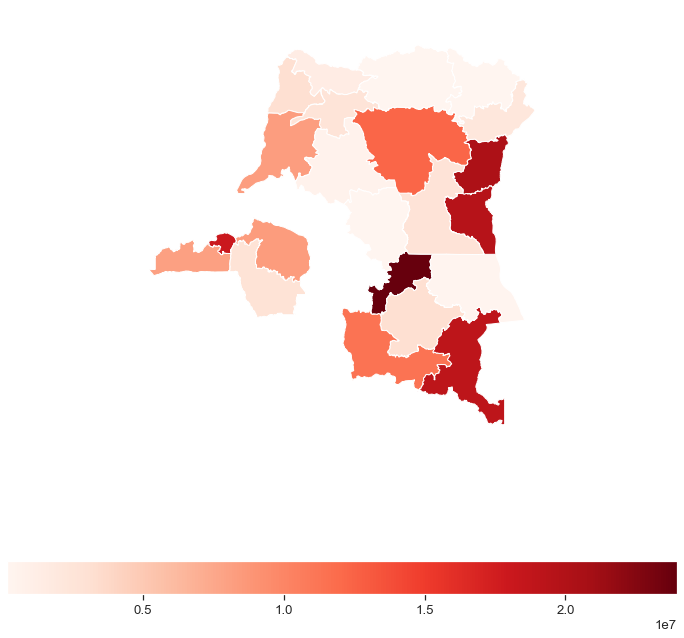

In [105]:
merged_df_agg = zone_gd.merge(df_obs_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [106]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Destination',right_on='Destination')
df_merged_agg['deltaVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='Destination')
df_merged_agg

Destination  Volume_x  Volume_y  deltaVolume
21        Bas-Uele    229497    243982     6.311629
11        Equateur   3181818   8346570   162.320786
3     Haut-Katanga   9983013  19096041    91.285346
13     Haut-Lomami   1464429   3190022   117.833845
24       Haut-Uele    101924    184440    80.958361
14           Ituri   1302005   2142905    64.585005
12           Kasai   2740731   5254192    91.707687
5    Kasai-Central   7948073  17816916   124.166487
0   Kasai-Oriental  15713253  33414921   112.654382
6         Kinshasa   7235112  18087187   149.991804
9    Kongo-Central   3535196   8123675   129.794190
15          Kwango   1277354   2862317   124.081735
10           Kwilu   3424013   8433125   146.293603
2           Lomami  11287918  23952281   112.193967
7          Lualaba   6618356  11370242    71.798586
16      Mai-Ndombe   1218327   4162152   241.628479
17         Maniema   1140872   2689295   135.722763
19         Mongala    894237   2634214   194.576717
1        Nord-Kivu  11481235  20307480    76.875397
20     Nord-Ubangi    464164   1440317   210.303470
25         Sankuru     87354    180718   106.880051
4         Sud-Kivu   9906210  19603468    97.890697
18      Sud-Ubangi   1015890   3163468   211.398675
23      Tanganyika    174633    280819    60.805232
8           Tshopo   3957420  12272864   210.122858
22         Tshuapa    188869    571503   202.592273

In [107]:
# dict_mob = {}
# for dest in list((df.groupby(by = 'Destination').groups.keys())):
#     baseline_value = df_ref['Volume'].loc[df_ref['Destination'] == dest ].sum() 
#      #avoid division by zero
#     if(baseline_value == 0):
#         continue
#     current_value = df_obs['Volume'].loc[df_obs['Destination'] == dest ].sum() 
#     dict_mob[dest] = (current_value - baseline_value)*100/baseline_value
# dict_mob
# df_mobility = pd.DataFrame(dict(provinces = list(dict_mob.keys()),Volume = list(dict_mob.values())))
# df_mobility

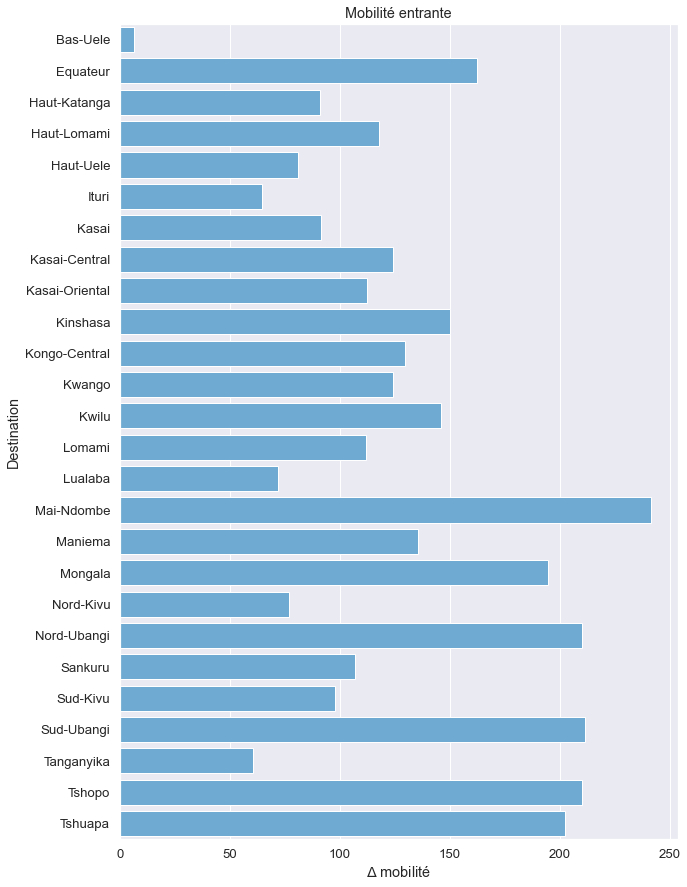

In [108]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Destination", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg, orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = '$\Delta$ mobilité')
plt.show()

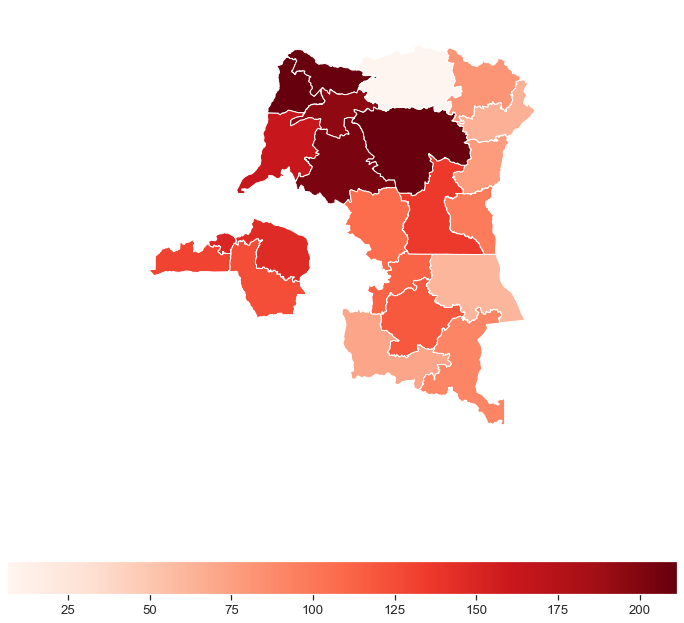

In [109]:
merged_agg = zone_gd.merge(df_merged_agg,left_on = 'PROVINCE', right_on = 'Destination' )
gpl.choropleth(
    merged_agg, hue=merged_agg['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (IN) trends By Provinces

In [213]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Kinshasa']

Destination  Date_day    Volume
63    Kinshasa         0  159590.0
64    Kinshasa         1  161836.0
65    Kinshasa         2  139855.0
66    Kinshasa         3  156839.0
67    Kinshasa         4  157759.5
68    Kinshasa         5  158974.0
69    Kinshasa         6  135611.0

In [214]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Kinshasa']

Date Destination  Date_day  Volume
9    2020-03-19    Kinshasa         3  142060
35   2020-03-20    Kinshasa         4  147623
61   2020-03-21    Kinshasa         5  146129
87   2020-03-22    Kinshasa         6  117748
113  2020-03-23    Kinshasa         0  134934
...         ...         ...       ...     ...
2555 2020-06-25    Kinshasa         3  579142
2581 2020-06-26    Kinshasa         4  547998
2607 2020-06-27    Kinshasa         5  640214
2633 2020-06-28    Kinshasa         6  661796
2659 2020-06-29    Kinshasa         0  571160

[103 rows x 4 columns]

In [215]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date  Destination  Date_day  Volume_x  Volume_y      deltaV
0    2020-03-19     Bas-Uele         3      3508    4114.0  -14.730190
360  2020-03-19       Tshopo         3     83304   91631.0   -9.087536
345  2020-03-19   Tanganyika         3      4436    3803.5   16.629420
45   2020-03-19  Haut-Lomami         3     25877   33787.0  -23.411371
330  2020-03-19   Sud-Ubangi         3     16354   20798.0  -21.367439
...         ...          ...       ...       ...       ...         ...
1858 2020-06-29  Nord-Ubangi         0     20882    8075.0  158.600619
1873 2020-06-29      Sankuru         0      3639    1744.0  108.658257
1888 2020-06-29     Sud-Kivu         0    354469  222257.0   59.486090
1903 2020-06-29   Sud-Ubangi         0     85633   19080.0  348.810273
1633 2020-06-29    Haut-Uele         0      1798    2548.0  -29.434851

[2676 rows x 6 columns]

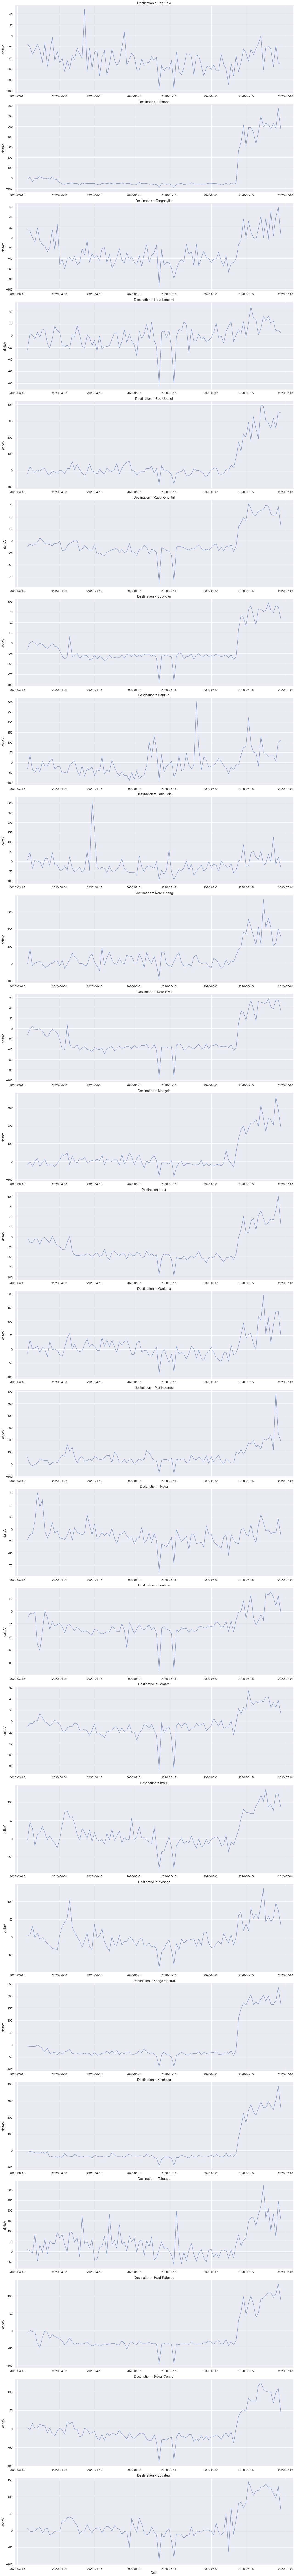

In [217]:
g = sns.FacetGrid(df_trend, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

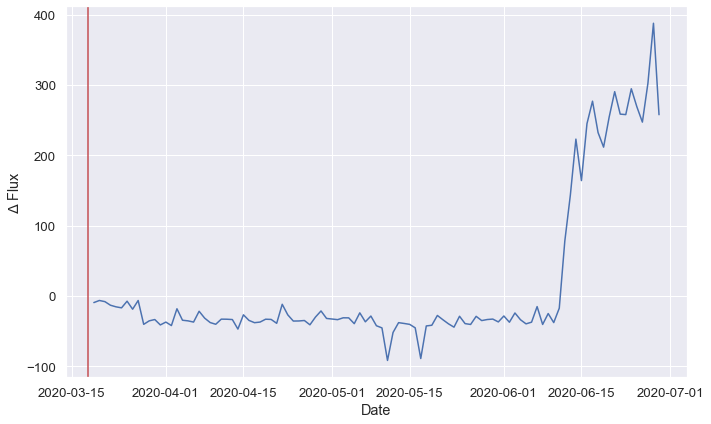

In [218]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Destination == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

## $\Delta$ Mobillity (OUT) By Provinces

In [191]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df['Date'] >= ref_start_date) & (df['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df['Date'] >= obs_start_date) & (df['Date'] <= obs_end_date)

df_ref_out = df.loc[mask_base]
df_obs_out = df.loc[mask_obs]


## Reference period

In [192]:
df_ref_agg_out = df_ref_out.groupby(by='Origin',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg_out.drop('Date_day',inplace=True,axis = 1)
df_ref_agg_out

Origin    Volume
5        Hors_Zone  41893996
9   Kasai-Oriental  13564780
14          Lomami   9986674
19       Nord-Kivu   7885070
22        Sud-Kivu   7430696
15         Lualaba   5321394
2     Haut-Katanga   5297359
8    Kasai-Central   4666796
10        Kinshasa   3389079
11   Kongo-Central   1969759
3      Haut-Lomami   1243816
7            Kasai   1010505
13           Kwilu    787178
6            Ituri    565780
12          Kwango    335103
25          Tshopo    333980
23      Sud-Ubangi    164715
1         Equateur    164406
16      Mai-Ndombe    142329
20     Nord-Ubangi    132307
18         Mongala     83163
17         Maniema     64876
0         Bas-Uele     48624
24      Tanganyika     39917
4        Haut-Uele     22931
26         Tshuapa     17541
21         Sankuru      9129

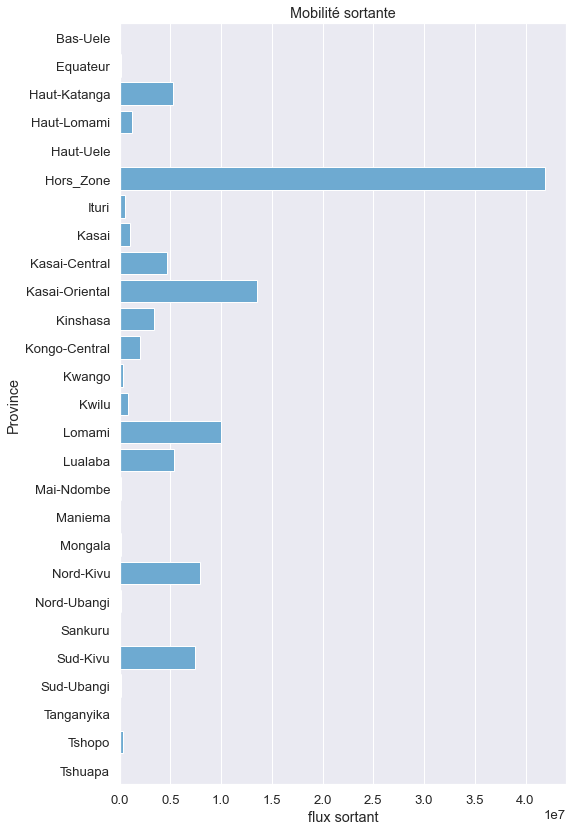

In [193]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_ref_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

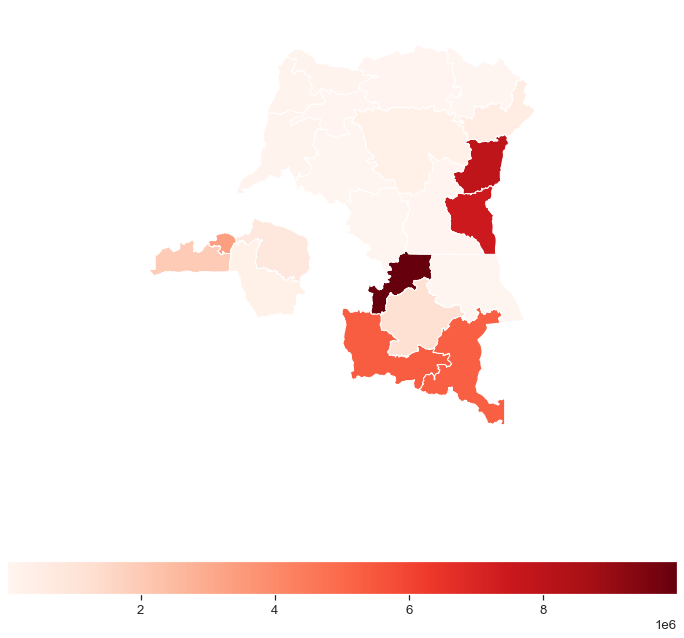

In [194]:
merged_df_agg_out = zone_gd.merge(df_ref_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Observation period

In [195]:
df_obs_agg_out = df_obs_out.groupby(by='Origin',as_index=0).sum().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg_out.drop('Date_day',inplace=True,axis = 1)
df_obs_agg_out

Origin     Volume
5        Hors_Zone  112609438
9   Kasai-Oriental   26889366
14          Lomami   20531304
19       Nord-Kivu   12986124
22        Sud-Kivu   12444549
8    Kasai-Central   10230773
15         Lualaba    8957933
2     Haut-Katanga    8536494
10        Kinshasa    3630554
3      Haut-Lomami    2693931
11   Kongo-Central    2511125
7            Kasai    1931953
13           Kwilu    1781883
6            Ituri     842151
12          Kwango     712465
16      Mai-Ndombe     614256
25          Tshopo     408762
1         Equateur     396644
23      Sud-Ubangi     261223
18         Mongala     227291
20     Nord-Ubangi     224334
17         Maniema     201987
0         Bas-Uele      70732
24      Tanganyika      37924
26         Tshuapa      34510
4        Haut-Uele      30950
21         Sankuru      26458

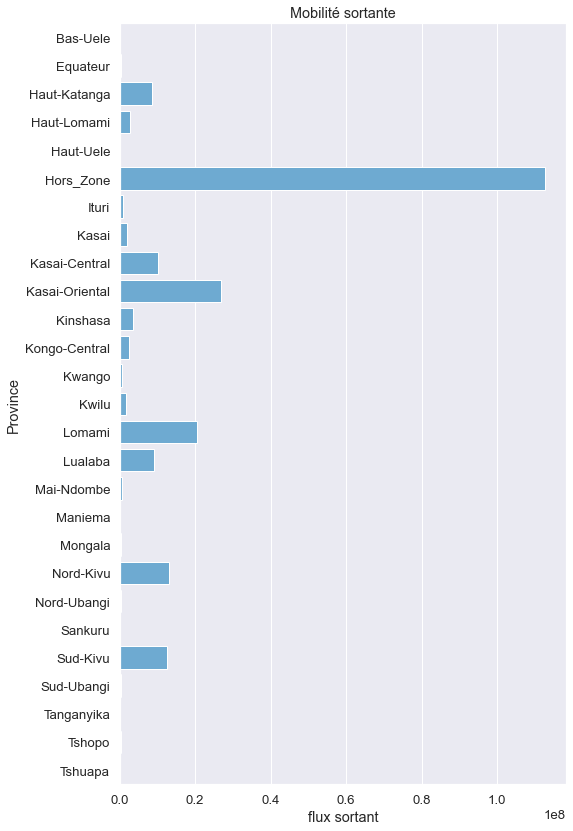

In [196]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Origin", x="Volume", palette=['#5DADE2'],data=df_obs_agg_out.sort_values(by = 'Origin',ascending=1), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = "flux sortant",ylabel = 'Province')
plt.show()

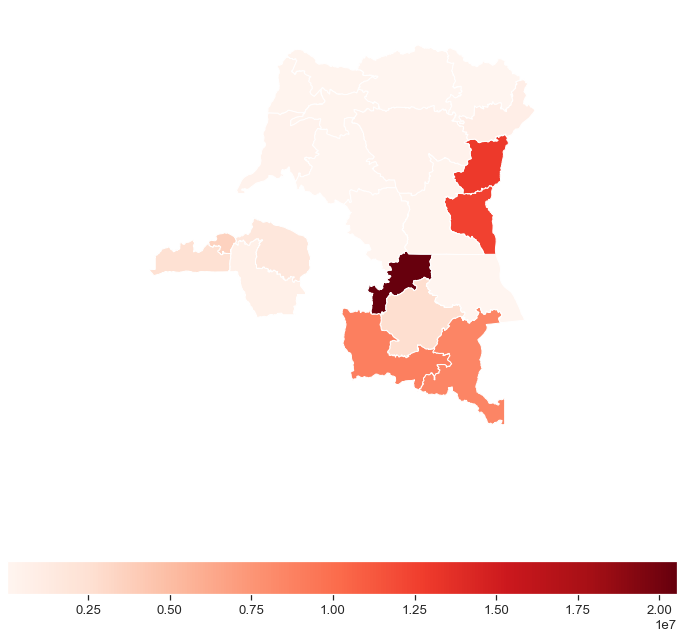

In [197]:
merged_df_agg_out = zone_gd.merge(df_obs_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_df_agg_out, hue=merged_df_agg_out['Volume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [198]:
df_merged_agg_out = pd.merge(df_ref_agg_out,df_obs_agg_out,left_on='Origin',right_on='Origin')
df_merged_agg_out['deltaVolume'] = (df_merged_agg_out.Volume_y - df_merged_agg_out.Volume_x )/df_merged_agg_out.Volume_x*100
df_merged_agg_out = df_merged_agg_out.sort_values(by='deltaVolume')
df_merged_agg_out

Origin  Volume_x   Volume_y  deltaVolume
23      Tanganyika     39917      37924    -4.992860
8         Kinshasa   3389079    3630554     7.125092
15          Tshopo    333980     408762    22.391161
9    Kongo-Central   1969759    2511125    27.483870
24       Haut-Uele     22931      30950    34.970128
22        Bas-Uele     48624      70732    45.467259
13           Ituri    565780     842151    48.847785
16      Sud-Ubangi    164715     261223    58.590899
6     Haut-Katanga   5297359    8536494    61.146224
3        Nord-Kivu   7885070   12986124    64.692565
4         Sud-Kivu   7430696   12444549    67.474877
5          Lualaba   5321394    8957933    68.338090
19     Nord-Ubangi    132307     224334    69.555655
11           Kasai   1010505    1931953    91.186882
25         Tshuapa     17541      34510    96.739068
1   Kasai-Oriental  13564780   26889366    98.229282
2           Lomami   9986674   20531304   105.587005
14          Kwango    335103     712465   112.610750
10     Haut-Lomami   1243816    2693931   116.585974
7    Kasai-Central   4666796   10230773   119.224774
12           Kwilu    787178    1781883   126.363415
17        Equateur    164406     396644   141.258835
0        Hors_Zone  41893996  112609438   168.796125
20         Mongala     83163     227291   173.307841
26         Sankuru      9129      26458   189.823639
21         Maniema     64876     201987   211.343178
18      Mai-Ndombe    142329     614256   331.574732

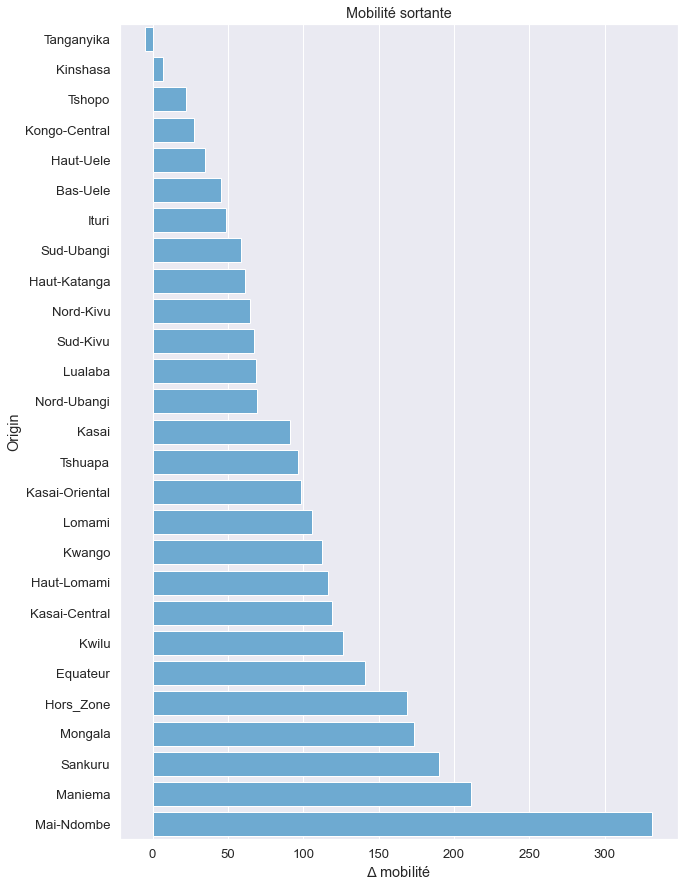

In [201]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Origin", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_out.sort_values(by='deltaVolume'), orient = 'h')
ax.set(title = 'Mobilité sortante',xlabel = '$\Delta$ mobilité')
plt.show()

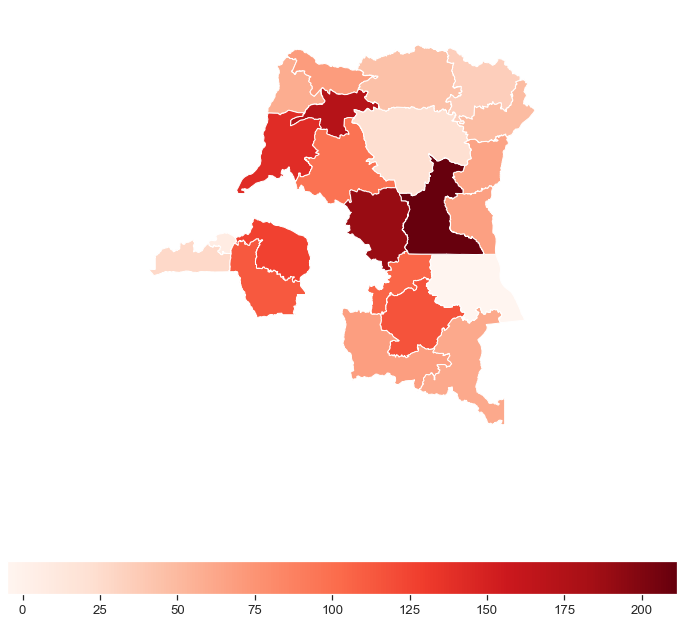

In [202]:
merged_agg_out = zone_gd.merge(df_merged_agg_out,left_on = 'PROVINCE', right_on = 'Origin' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (OUT) trends By Provinces

In [220]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Origin','Date_day'],as_index=0).sum().groupby(by=['Origin','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Origin == 'Kinshasa']

Origin  Date_day   Volume
70  Kinshasa         0  60751.0
71  Kinshasa         1  71052.0
72  Kinshasa         2  74293.0
73  Kinshasa         3  73158.0
74  Kinshasa         4  77708.0
75  Kinshasa         5  84530.0
76  Kinshasa         6  65198.0

In [221]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Origin == 'Kinshasa']

Date    Origin  Date_day  Volume
10   2020-03-19  Kinshasa         3   72555
37   2020-03-20  Kinshasa         4   78232
64   2020-03-21  Kinshasa         5   93867
90   2020-03-22  Kinshasa         6   59067
116  2020-03-23  Kinshasa         0   59541
...         ...       ...       ...     ...
2580 2020-06-25  Kinshasa         3   38618
2606 2020-06-26  Kinshasa         4   41286
2632 2020-06-27  Kinshasa         5   48544
2658 2020-06-28  Kinshasa         6   35505
2685 2020-06-29  Kinshasa         0   24263

[103 rows x 4 columns]

In [222]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Origin','Date_day'],right_on=['Origin','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date          Origin  Date_day  Volume_x  Volume_y      deltaV
0    2020-03-19        Bas-Uele         3      1798    1132.5   58.763797
30   2020-03-19    Haut-Katanga         3    102474  110662.5   -7.399526
45   2020-03-19     Haut-Lomami         3     27424   26644.0    2.927488
104  2020-03-19           Kasai         3     15964   21712.0  -26.473839
385  2020-03-19         Tshuapa         3       460    1115.0  -58.744395
...         ...             ...       ...       ...       ...         ...
1925 2020-06-29      Tanganyika         0       249     939.0  -73.482428
1644 2020-06-29       Hors_Zone         0   3171410  954309.0  232.325274
1940 2020-06-29          Tshopo         0      2528    6500.0  -61.107692
1704 2020-06-29  Kasai-Oriental         0    224660  284790.0  -21.113803
2701 2020-06-29         Tshuapa         0       691     212.5  225.176471

[2702 rows x 6 columns]

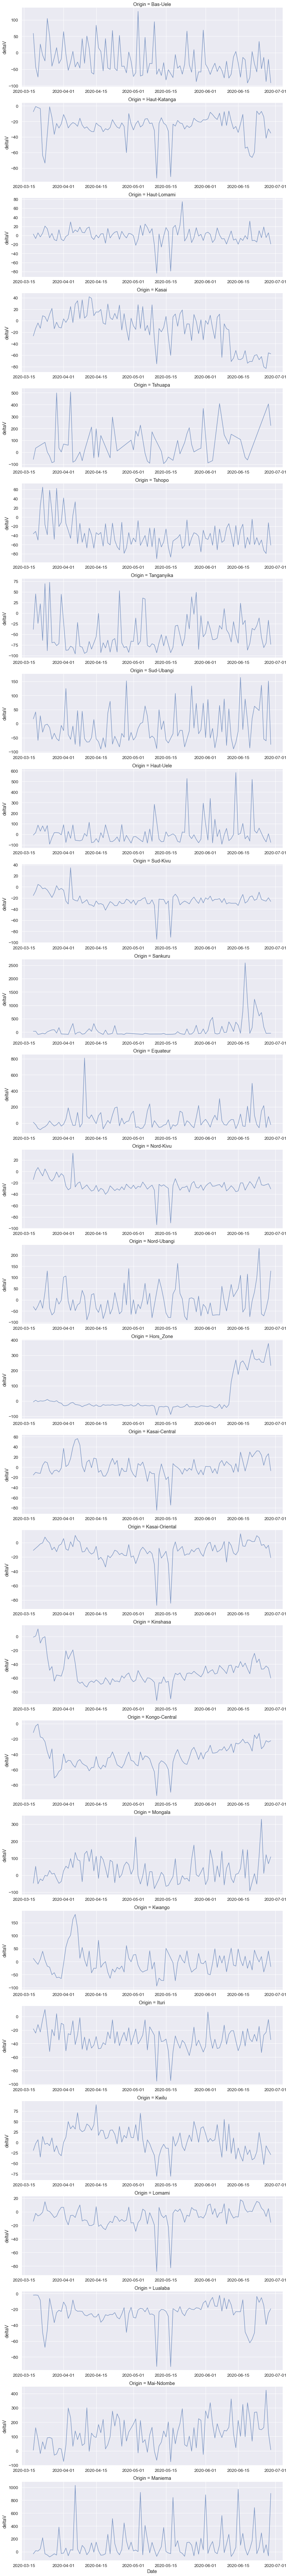

In [224]:
g = sns.FacetGrid(df_trend, row="Origin",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

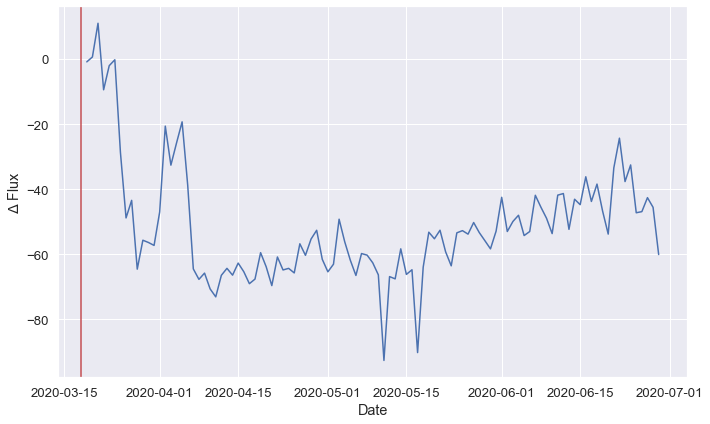

In [210]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Origin == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

# Presence Visualization

In [225]:
# reading csv file
dfp = pd.read_csv('data/Zoning Province/Presence_24h.csv',sep = ';')
dfp

Date Day_type PresenceType      Type Activity_Zone  Home_Zone  \
0       2020-01-31       JO         Jour     Local     Hors_Zone  Hors_Zone   
1       2020-01-31       JO         Nuit     Local     Hors_Zone  Hors_Zone   
2       2020-01-31       JO         Jour     Local    Tanganyika  Hors_Zone   
3       2020-01-31       JO         Nuit     Local    Tanganyika  Hors_Zone   
4       2020-01-31       JO         Jour     Local  Haut-Katanga  Hors_Zone   
...            ...      ...          ...       ...           ...        ...   
173129  2020-06-29       JO         Nuit  Etranger     Nord-Kivu  Hors_Zone   
173130  2020-06-29       JO         Jour  Etranger     Hors_Zone  Nord-Kivu   
173131  2020-06-29       JO         Nuit  Etranger     Hors_Zone  Nord-Kivu   
173132  2020-06-29       JO         Jour  Etranger     Nord-Kivu  Nord-Kivu   
173133  2020-06-29       JO         Nuit  Etranger     Nord-Kivu  Nord-Kivu   

              Zone  Volume  
0       Tanganyika  105322  
1       Tanganyika   34120  
2       Tanganyika   79901  
3       Tanganyika   20994  
4       Tanganyika     176  
...            ...     ...  
173129   Nord-Kivu     968  
173130   Nord-Kivu    1575  
173131   Nord-Kivu    2025  
173132   Nord-Kivu    4589  
173133   Nord-Kivu    3833  

[173134 rows x 8 columns]

In [226]:
dfp.count()

Date             173134
Day_type         173134
PresenceType     173134
Type             173134
Activity_Zone    173134
Home_Zone        173134
Zone             173134
Volume           173134
dtype: int64

In [227]:
# Conversion of date field
dfp['Date'] = pd.to_datetime(dfp['Date'])
# dfp['Date_day'] = dfp['Date'].dt.weekday

In [228]:
list((dfp.groupby(by = 'Day_type').groups.keys()))

['JO', 'WE']

In [229]:
list((dfp.groupby(by = 'PresenceType').groups.keys()))

['Jour', 'Nuit']

In [230]:
list((dfp.groupby(by = 'Type').groups.keys()))

['Etranger', 'Local']

In [231]:
activities_zone = list((dfp.groupby(by = 'Activity_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [232]:
home_zone = list((dfp.groupby(by = 'Home_Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [233]:
zone = list((dfp.groupby(by = 'Zone').groups.keys()))
print(activities_zone, len(activities_zone))

['Bas-Uele', 'Equateur', 'Haut-Katanga', 'Haut-Lomami', 'Haut-Uele', 'Hors_Zone', 'Ituri', 'Kasai', 'Kasai-Central', 'Kasai-Oriental', 'Kinshasa', 'Kongo-Central', 'Kwango', 'Kwilu', 'Lomami', 'Lualaba', 'Mai-Ndombe', 'Maniema', 'Mongala', 'Nord-Kivu', 'Nord-Ubangi', 'Sankuru', 'Sud-Kivu', 'Sud-Ubangi', 'Tanganyika', 'Tshopo', 'Tshuapa'] 27


In [238]:
df_dzp = dfp.groupby(["Date","Zone",'PresenceType'],as_index=0).sum()
df_dzp.groupby(["Zone",'PresenceType'],as_index=0).median()

Zone PresenceType      Volume
0         Bas-Uele         Jour    128737.0
1         Bas-Uele         Nuit     65970.0
2         Equateur         Jour   7643970.5
3         Equateur         Nuit   5586644.5
4     Haut-Katanga         Jour  17652248.0
5     Haut-Katanga         Nuit  11153133.5
6      Haut-Lomami         Jour    649897.5
7      Haut-Lomami         Nuit    360279.0
8        Haut-Uele         Jour    104706.5
9        Haut-Uele         Nuit     45125.5
10           Ituri         Jour   1552285.5
11           Ituri         Nuit    911295.0
12           Kasai         Jour   2748466.0
13           Kasai         Nuit   1266583.5
14   Kasai-Central         Jour  10914122.0
15   Kasai-Central         Nuit   6038605.0
16  Kasai-Oriental         Jour   9979257.5
17  Kasai-Oriental         Nuit   7531154.0
18        Kinshasa         Jour  12063087.5
19        Kinshasa         Nuit   9017805.0
20   Kongo-Central         Jour   4195362.0
21   Kongo-Central         Nuit   3185806.5
22          Kwango         Jour   1960785.0
23          Kwango         Nuit   1019110.0
24           Kwilu         Jour   7548283.5
25           Kwilu         Nuit   3786404.5
26          Lomami         Jour   4625438.0
27          Lomami         Nuit   3604607.0
28         Lualaba         Jour   4446823.5
29         Lualaba         Nuit   2762716.5
30      Mai-Ndombe         Jour   3161984.0
31      Mai-Ndombe         Nuit   1725451.5
32         Maniema         Jour   3240309.0
33         Maniema         Nuit   1643100.5
34         Mongala         Jour   2206784.5
35         Mongala         Nuit   1117796.0
36       Nord-Kivu         Jour  12308689.0
37       Nord-Kivu         Nuit   7677294.0
38     Nord-Ubangi         Jour   1275497.5
39     Nord-Ubangi         Nuit    585887.5
40         Sankuru         Jour    107431.0
41         Sankuru         Nuit     61286.0
42        Sud-Kivu         Jour   9361157.0
43        Sud-Kivu         Nuit   6490453.5
44      Sud-Ubangi         Jour   2647740.5
45      Sud-Ubangi         Nuit   1368085.0
46      Tanganyika         Jour    249933.0
47      Tanganyika         Nuit    123703.0
48          Tshopo         Jour  14002660.5
49          Tshopo         Nuit  10119522.5
50         Tshuapa         Jour    534246.5
51         Tshuapa         Nuit    277737.5



Let's first consider presence at night

In [240]:
#Aggregate by date and zone
dfp_night = dfp[dfp.PresenceType == 'Nuit']
dfp_agg_date_zone = dfp_night.groupby(by=['Date','Zone'],as_index=0).sum()
dfp_agg_date_zone

Date          Zone    Volume
0    2020-01-31      Bas-Uele     75451
1    2020-01-31      Equateur   5417668
2    2020-01-31  Haut-Katanga  11015534
3    2020-01-31   Haut-Lomami    339787
4    2020-01-31     Haut-Uele     58661
...         ...           ...       ...
3791 2020-06-29      Sud-Kivu   6006587
3792 2020-06-29    Sud-Ubangi   1711492
3793 2020-06-29    Tanganyika     97058
3794 2020-06-29        Tshopo   9341227
3795 2020-06-29       Tshuapa    405296

[3796 rows x 3 columns]

### Visualization of distributions

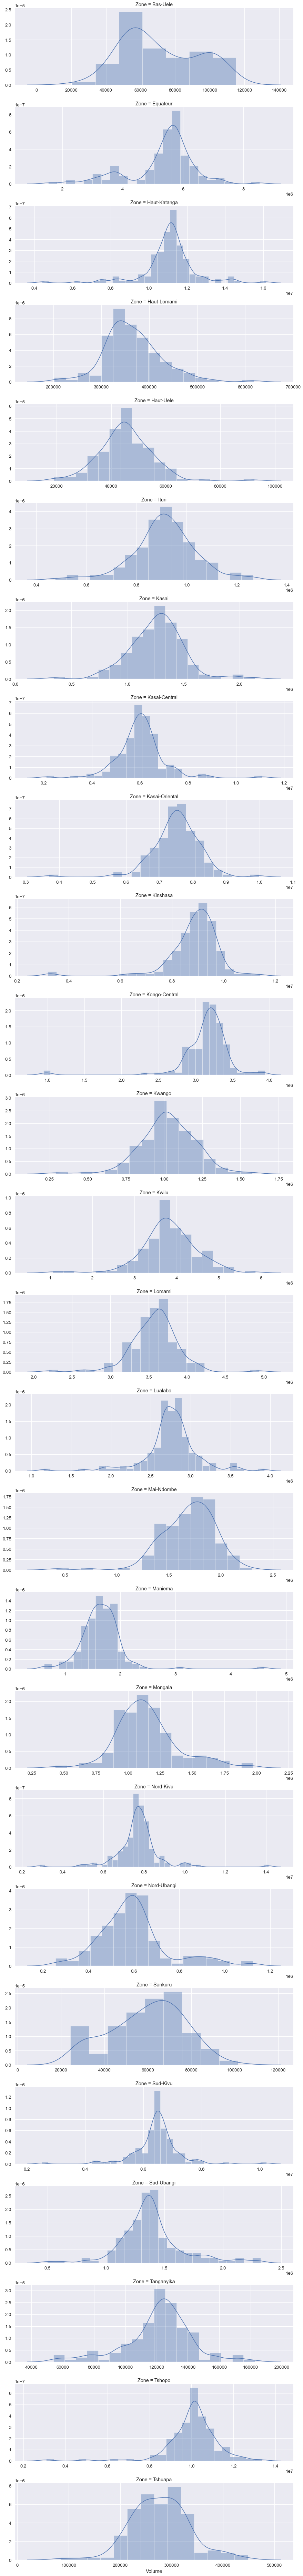

In [243]:
# fig = plt.figure(figsize=(8,5))
# ax = sns.distplot(a=dfp_agg_date_zone[(dfp_agg_date_zone.Zone == 'Kinshasa')]["Volume"])
# ax.set(title = 'Présence',xlabel = "presence",ylabel = '$P(x)$')
# plt.show()

g = sns.FacetGrid(dfp_agg_date_zone, row="Zone",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(sns.distplot, "Volume")
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

In [66]:
dfp_agg_date_zone.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume')

Zone      Volume
4        Haut-Uele     45125.5
20         Sankuru     61286.0
0         Bas-Uele     65970.0
23      Tanganyika    123703.0
25         Tshuapa    277737.5
3      Haut-Lomami    360279.0
19     Nord-Ubangi    585887.5
5            Ituri    911295.0
11          Kwango   1019110.0
17         Mongala   1117796.0
6            Kasai   1266583.5
22      Sud-Ubangi   1368085.0
16         Maniema   1643100.5
15      Mai-Ndombe   1725451.5
14         Lualaba   2762716.5
10   Kongo-Central   3185806.5
13          Lomami   3604607.0
12           Kwilu   3786404.5
1         Equateur   5586644.5
7    Kasai-Central   6038605.0
21        Sud-Kivu   6490453.5
8   Kasai-Oriental   7531154.0
18       Nord-Kivu   7677294.0
9         Kinshasa   9017805.0
24          Tshopo  10119522.5
2     Haut-Katanga  11153133.5

## Comparison of ref period and obs period

In [253]:
# Date Conversion
dfp_agg_date_zone['Date'] = pd.to_datetime(dfp_agg_date_zone['Date'])
dfp_agg_date_zone['Date_day'] = dfp_agg_date_zone['Date'].dt.weekday

In [254]:
ref_start_date = '2020-02-02'
ref_end_date = '2020-03-18'

mask_base = (dfp_agg_date_zone['Date'] >= ref_start_date) & (dfp_agg_date_zone['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-04-26'

mask_obs = (dfp_agg_date_zone['Date'] >= obs_start_date) & (dfp_agg_date_zone['Date'] <= obs_end_date)

df_ref_p = dfp_agg_date_zone.loc[mask_base]
df_obs_p = dfp_agg_date_zone.loc[mask_obs]

In [255]:
#data aggregation
df_ref_agg_p = df_ref_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg_p.drop('Date_day',inplace=True,axis = 1)

df_obs_agg_p = df_obs_p.groupby(by=['Zone'],as_index=0).median().sort_values(by='Volume',ascending=0)
# df_obs_agg_p.drop('Date_day',inplace=True,axis = 1)


df_merged_agg_p = pd.merge(df_ref_agg_p,df_obs_agg_p,left_on=['Zone'],right_on=['Zone'])
df_merged_agg_p['deltaVolume'] = (df_merged_agg_p.Volume_y - df_merged_agg_p.Volume_x )/df_merged_agg_p.Volume_x*100
df_merged_agg_p = df_merged_agg_p.sort_values(by='deltaVolume')
df_merged_agg_p

Zone  Volume_x  Date_day_x  Volume_y  Date_day_y  deltaVolume
23        Bas-Uele     99436           3     56200           3   -43.481234
24         Sankuru     64654           3     48857           3   -24.433136
19     Nord-Ubangi    601290           3    497833           3   -17.205841
16         Mongala   1195600           3   1009671           3   -15.551104
25       Haut-Uele     46940           3     39997           3   -14.791223
21         Tshuapa    293635           3    250289           3   -14.761864
22      Tanganyika    128058           3    112695           3   -11.996908
15           Kasai   1385773           3   1228716           3   -11.333530
14      Sud-Ubangi   1404919           3   1248138           3   -11.159433
17          Kwango   1117129           3   1004585           3   -10.074396
13         Maniema   1821445           3   1643327           3    -9.778939
2         Kinshasa   9243871           3   8410486           3    -9.015541
12      Mai-Ndombe   1826057           3   1687051           3    -7.612358
11         Lualaba   2853525           3   2727543           3    -4.414960
4   Kasai-Oriental   7808636           3   7492259           3    -4.051630
5         Sud-Kivu   6569983           3   6402625           3    -2.547313
3        Nord-Kivu   7854964           3   7676589           3    -2.270857
10   Kongo-Central   3171607           3   3186725           3     0.476667
20     Haut-Lomami    335342           3    338371           3     0.903257
0     Haut-Katanga  11080830           3  11227249           3     1.321372
1           Tshopo  10103660           3  10320340           3     2.144569
6    Kasai-Central   6047364           3   6183134           3     2.245110
18           Ituri    885826           3    908069           3     2.510990
9           Lomami   3466466           3   3565227           3     2.849040
7         Equateur   5485402           3   5926589           3     8.042929
8            Kwilu   3729634           3   4195450           3    12.489590

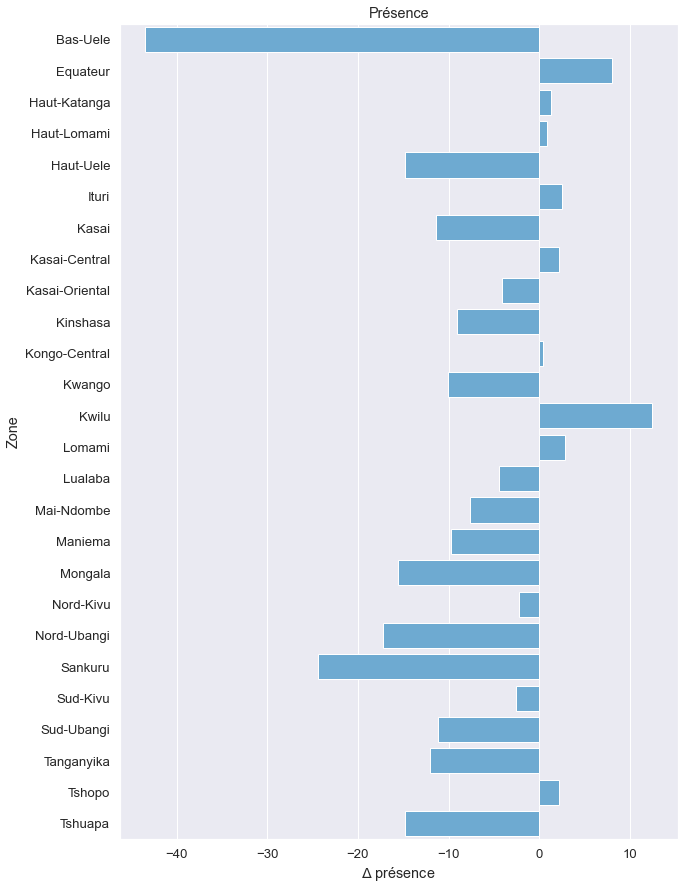

In [256]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Zone", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg_p.sort_values(by='Zone'), orient = 'h')
ax.set(title = 'Présence',xlabel = '$\Delta$ présence')
plt.show()

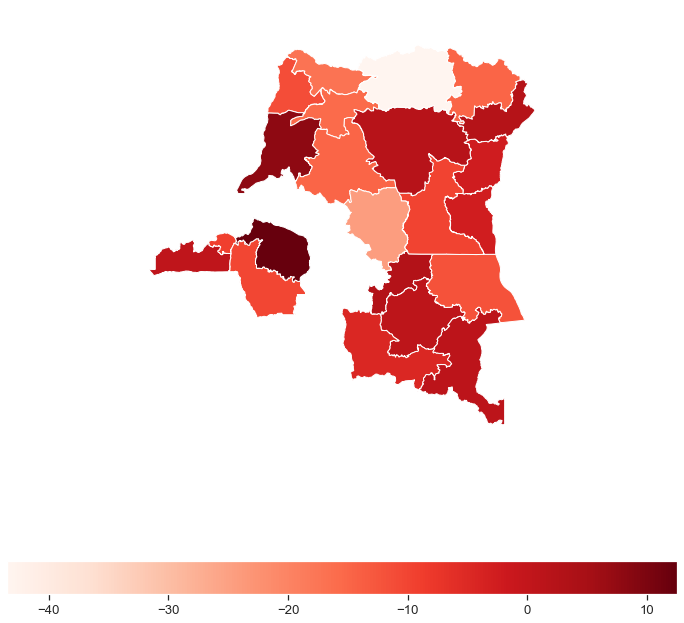

In [257]:
merged_agg_out = zone_gd.merge(df_merged_agg_p,left_on = 'PROVINCE', right_on = 'Zone' )
gpl.choropleth(
    merged_agg_out, hue=merged_agg_out['deltaVolume'],
    cmap='Reds', figsize=(12, 12),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Presence trends By Provinces

In [258]:
df_ref_agg_date_day = df_ref_p.groupby(by=['Date','Zone','Date_day'],as_index=0).sum().groupby(by=['Zone','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Zone == 'Kinshasa']

Zone  Date_day     Volume
63  Kinshasa         0  8893147.0
64  Kinshasa         1  9152189.0
65  Kinshasa         2  9413726.5
66  Kinshasa         3  9134572.0
67  Kinshasa         4  9436364.0
68  Kinshasa         5  9472602.0
69  Kinshasa         6  9243871.0

In [259]:
df_obs_agg_date_dest_dd = df_obs_p.groupby(by=['Date','Zone','Date_day'],as_index=0).sum()
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Zone == 'Kinshasa']

Date      Zone  Date_day    Volume
9   2020-03-19  Kinshasa         3   8581918
35  2020-03-20  Kinshasa         4   8401465
61  2020-03-21  Kinshasa         5   9275254
87  2020-03-22  Kinshasa         6  11418548
113 2020-03-23  Kinshasa         0   6189726
139 2020-03-24  Kinshasa         1   8410486
165 2020-03-25  Kinshasa         2   8356684
191 2020-03-26  Kinshasa         3   8121093
217 2020-03-27  Kinshasa         4   7943057
243 2020-03-28  Kinshasa         5   9614180
269 2020-03-29  Kinshasa         6   8087387
295 2020-03-30  Kinshasa         0   7529050
321 2020-03-31  Kinshasa         1   7954351
347 2020-04-01  Kinshasa         2   8563329
373 2020-04-02  Kinshasa         3   8612500
399 2020-04-03  Kinshasa         4   8069505
425 2020-04-04  Kinshasa         5   7697530
451 2020-04-05  Kinshasa         6   8297049
477 2020-04-06  Kinshasa         0   7129491
503 2020-04-07  Kinshasa         1   8022871
529 2020-04-08  Kinshasa         2   9246961
555 2020-04-09  Kinshasa         3   8591502
581 2020-04-10  Kinshasa         4   8409595
607 2020-04-11  Kinshasa         5   8345532
633 2020-04-12  Kinshasa         6   8759813
659 2020-04-13  Kinshasa         0   7988844
685 2020-04-14  Kinshasa         1   8729171
711 2020-04-15  Kinshasa         2   8266989
737 2020-04-16  Kinshasa         3   9120503
763 2020-04-17  Kinshasa         4   8051407
789 2020-04-18  Kinshasa         5   8770670
815 2020-04-19  Kinshasa         6   8103093
841 2020-04-20  Kinshasa         0   8905477
867 2020-04-21  Kinshasa         1   8835658
893 2020-04-22  Kinshasa         2   8446243
919 2020-04-23  Kinshasa         3   8818233
945 2020-04-24  Kinshasa         4   9014134
971 2020-04-25  Kinshasa         5   8893527
997 2020-04-26  Kinshasa         6   9838899

In [260]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Zone','Date_day'],right_on=['Zone','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date            Zone  Date_day  Volume_x   Volume_y     deltaV
0   2020-03-19        Bas-Uele         3     83311    97606.0 -14.645616
36  2020-03-19           Kasai         3   1352772  1263954.0   7.026996
42  2020-03-19   Kasai-Central         3   5753675  5667920.5   1.512980
48  2020-03-19  Kasai-Oriental         3   7336975  7728277.0  -5.063250
108 2020-03-19       Nord-Kivu         3   7277411  7599682.5  -4.240592
..         ...             ...       ...       ...        ...        ...
593 2020-04-26         Sankuru         6     30988    62849.0 -50.694522
509 2020-04-26           Kasai         6   1450912  1387263.0   4.588099
503 2020-04-26           Ituri         6    991765   856872.0  15.742491
623 2020-04-26         Tshuapa         6    270714   293897.0  -7.888138
533 2020-04-26   Kongo-Central         6   3402287  3223851.0   5.534871

[1014 rows x 6 columns]

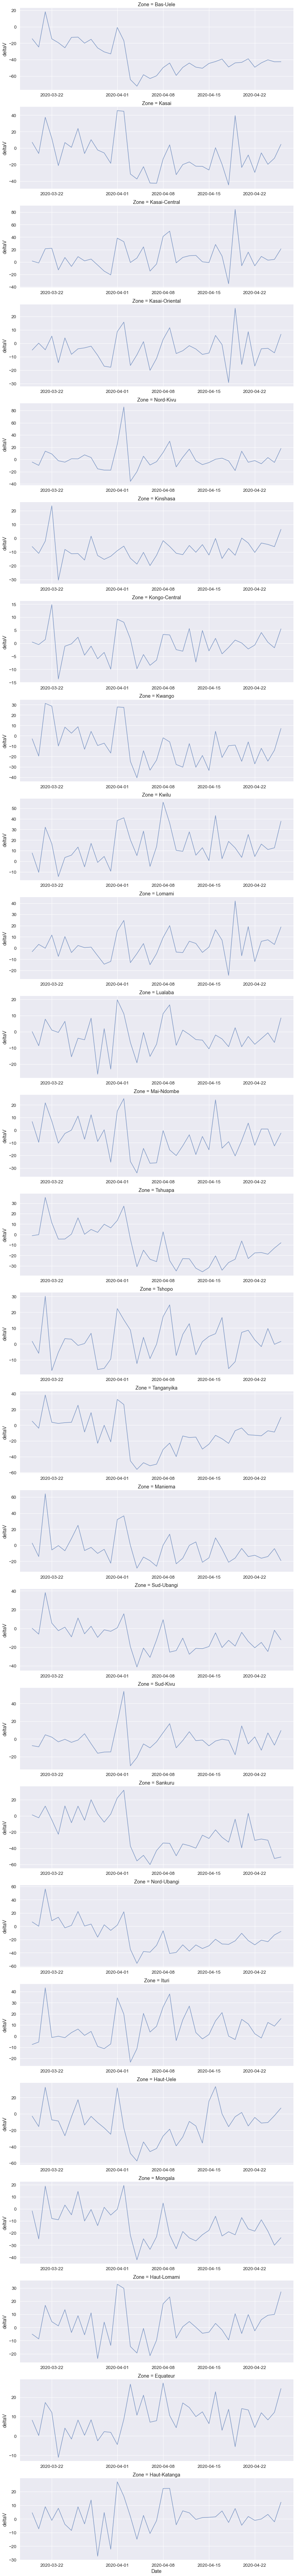

In [261]:
g = sns.FacetGrid(df_trend, row="Zone",aspect=3,height=4,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

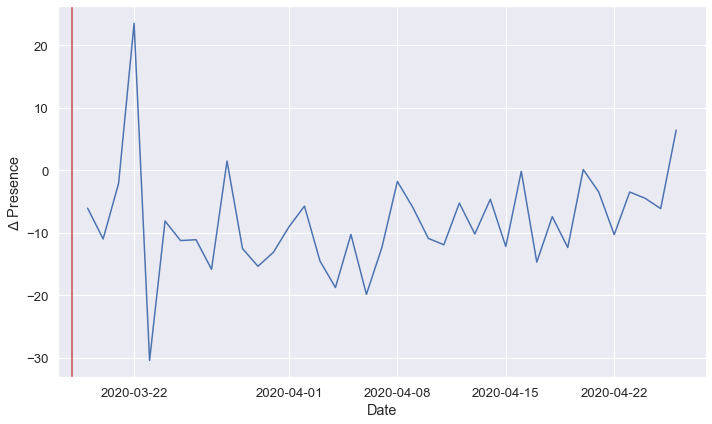

In [264]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Zone == 'Kinshasa'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set(ylabel = '$\Delta$ Presence')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()